In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [91]:
boston = load_boston()
boston.keys()
x = pd.DataFrame(boston["data"], columns=boston['feature_names'])
y = pd.DataFrame(boston["target"], columns=['price'])

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [93]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [94]:
y_pred = model.predict(x_test)
r2_score(model.predict(x_test), y_test)
mse1 = mean_squared_error(y_test, y_pred)

In [95]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=boston['feature_names'])

x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=boston['feature_names'])

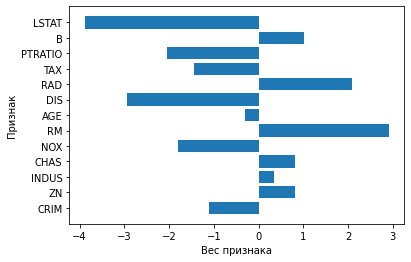

In [96]:
model.fit(x_train_scaled, y_train)

plt.barh(boston['feature_names'], model.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [97]:
important_features = [
    feature
    for feature, weight in zip(boston['feature_names'], model.coef_.flatten())
    if np.abs(weight) > 0.5
]

In [98]:
model.fit(
    x_train_scaled.loc[:, important_features],
    y_train
)

y_pred = model.predict(x_test_scaled.loc[:, important_features])

mse2 = mean_squared_error(y_test, y_pred)

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [112]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model.fit(x_train_scaled.loc[:, important_features], y_train.values[:, 0])
y_pred = model.predict(x_test_scaled.loc[:, important_features])
mse3 = mean_squared_error(y_test, y_pred)

In [113]:
print(f'mse1 = {mse1}, mse2 = {mse2}, mse3 = {mse3}')

mse1 = 19.64625014592812, mse2 = 23.850685901073568, mse3 = 11.077936787625092
